In [2]:
import numpy as np
from matplotlib import pyplot as plt
#import seaborn as sns
#import rectpack as rp
import fill_rectangles as rpmp
import time
import copy
#sns.set(style="white")

importing fill_rectangles.py


initializing global parameters...
SEQ_SUBFIELD: [0, 1, 2, 1, 3, 4, 3, 1, 5, 6, 7, 8, 1, 9, 4, 6, 10, 11, 6, 12, 13, 12, 7, 14, 15, 16, 9, 3, 17, 18, 6, 19, 20, 21, 22, 23, 1, 2, 1, 12, 5, 24]
0


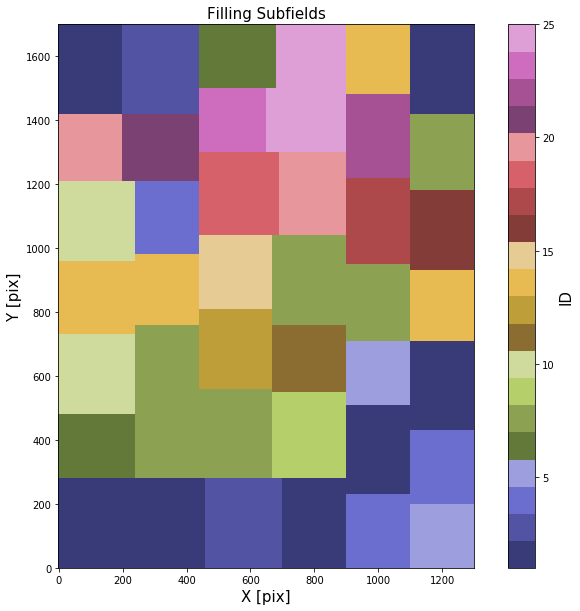

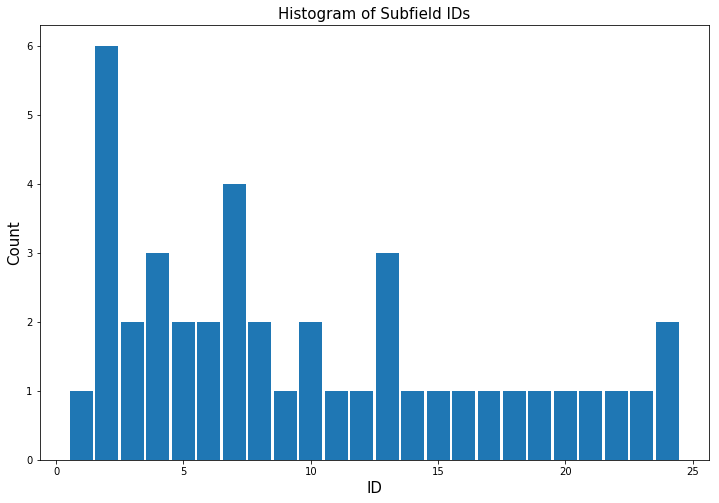

In [23]:
path = '/Users/inchanji/Research/rect_packing/output/NMG_60_45.txt'

data = np.array([line.rstrip('\n').split() for line in open(path)])

subfield = rpmp.rectangles()
Nsubfield = int(data[1][1])
for i in range(Nsubfield):
    subfield.add(int(data[3+i][2]),int(data[3+i][3]))
    

SEQ_SUBFIELD = [ int(num.split(',')[0])-1 for num in data[Nsubfield+4]] 
print 'SEQ_SUBFIELD:', SEQ_SUBFIELD

subfield.maxw_map = int(data[1][3]); subfield.maxh_map = int(data[1][2]);
subfield.save_field()

      
#FIELD, ToGo = rpmp.FILL_RECTS(SEQ_SUBFIELD, subfield)

FIELD = subfield.fieldmap.copy()
FIELD[:,:] = 0; 
Nrow, Ncol = np.shape(subfield.fieldmap)
SEG = np.zeros((Nrow, Ncol), dtype = 'int')
for i in range(len(SEQ_SUBFIELD)):
    node 	= rpmp.find_all_nodes(FIELD)
    y_st 	= node[0][0]; x_st = node[0][1];
    WIDTH 	= node[1][1] - node[0][1] + 1;
    HEIGHT 	= subfield.maxh_map - node[0][0] 
    dy	= subfield.type[SEQ_SUBFIELD[i]][0]; 
    dx 	= subfield.type[SEQ_SUBFIELD[i]][1];
    if (y_st+dy > Nrow) | (x_st+dx > Ncol): print 'warning!!!'
    FIELD[y_st:y_st+dy,x_st:x_st+dx] = subfield.ID[SEQ_SUBFIELD[i]]
    SEG[y_st:y_st+dy,x_st:x_st+dx] += 1

print  np.sum((SEG == 0) | (SEG > 1))
    
plt.figure(figsize=(12,10))
plt.imshow(FIELD,cmap='tab20b', origin='lower',vmin=np.min(FIELD), vmax=np.max(FIELD))
plt.xlabel('X [pix]',fontsize = 15)
plt.ylabel('Y [pix]',fontsize = 15)
plt.title('Filling Subfields',fontsize = 15)
plt.colorbar().set_label(label='ID',size=15)
plt.show()

plt.figure(figsize=(12,8))
plt.hist(np.array(SEQ_SUBFIELD)+0.5, bins = np.arange(subfield.Ntype)+0.5,rwidth = 0.9)
plt.title('Histogram of Subfield IDs',fontsize = 15)
plt.xlabel('ID',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()


In [ ]:
lenslet = rpmp.rectangles()
Nlenslet = int(data[Nsubfield + 6][1])
for i in range(Nlenslet):
    lenslet.add(int(data[Nsubfield+8+i][2]),int(data[Nsubfield+8+i][3]))

print Nlenslet    
print lenslet.type    

FIELD2 = np.zeros(np.shape(FIELD))
for i in range(len(SEQ_SUBFIELD)):
#for i in range(1):
    nodes =  rpmp.find_all_nodes(FIELD2)
    origin = nodes[0]
    iSUBFILED = SEQ_SUBFIELD[i]
    print iSUBFILED, ' fill', subfield.type[iSUBFILED], 'at ',nodes[0]
    lenslet.maxh_map, lenslet.maxw_map = subfield.type[iSUBFILED]
    lenslet.save_field()    
    SEQ_LENSLET = [ int(num.split(',')[0])-1 for num in data[Nsubfield+Nlenslet+9+i]] 
    
    SUBFIELD = np.zeros(np.shape(lenslet.fieldmap), dtype = int)
    print 'Subfield No. ',i, ' > Size: ', np.shape(lenslet.fieldmap)
    for j in range(len(SEQ_LENSLET)):
        subnodes =  rpmp.find_all_nodes(SUBFIELD)
        dy, dx   =  lenslet.type[SEQ_LENSLET[j]]
        y0sub, x0sub =  subnodes[0]

        y0 = y0sub + nodes[0][0]; x0 = x0sub + nodes[0][1];
        FIELD2[y0:y0+dy, x0:x0+dx]              = lenslet.ID[SEQ_LENSLET[j]]    
        SUBFIELD[y0sub:y0sub+dy,x0sub:x0sub+dx] = lenslet.ID[SEQ_LENSLET[j]]    
        #FIELD2[nodes[0][0]:nodes[0][0]+lenslet.maxh_map,nodes[0][1]:nodes[0][1]+lenslet.maxw_map] = SUBFIELD

    
plt.figure(figsize=(12,10))
plt.imshow(FIELD2,cmap='tab20b', origin='lower',vmin=np.min(FIELD2), vmax=np.max(FIELD2))
#plt.imshow(FIELD2[:300,:300],cmap='tab20b', origin='lower',vmin=np.min(FIELD2), vmax=np.max(FIELD2))
#plt.imshow(SUBFIELD,cmap='tab20b', origin='lower',vmin=np.min(SUBFIELD), vmax=np.max(SUBFIELD))
plt.xlabel('X [pix]',fontsize = 15)
plt.ylabel('Y [pix]',fontsize = 15)
plt.title('Filling Lenslets',fontsize = 15)
plt.colorbar().set_label(label='ID',size=15)
plt.show()


initializing global parameters...
12
[(50, 50), (30, 50), (50, 20), (30, 20), (40, 30), (40, 40), (40, 50), (30, 40), (30, 30), (50, 40), (40, 20), (50, 30)]
0  fill (280, 260) at  (0, 0)
Subfield No.  0  > Size:  (280, 260)
1  fill (280, 200) at  (0, 260)
Subfield No.  1  > Size:  (280, 200)
2  fill (280, 240) at  (0, 460)
Subfield No.  2  > Size:  (280, 240)
1  fill (280, 200) at  (0, 700)
Subfield No.  3  > Size:  (280, 200)
3  fill (230, 200) at  (0, 900)
Subfield No.  4  > Size:  (230, 200)
4  fill (200, 200) at  (0, 1100)
Subfield No.  5  > Size:  (200, 200)
3  fill (230, 200) at  (200, 1100)
Subfield No.  6  > Size:  (230, 200)
1  fill (280, 200) at  (230, 900)
Subfield No.  7  > Size:  (280, 200)
5  fill (200, 240) at  (280, 0)
Subfield No.  8  > Size:  (200, 240)
6  fill (240, 200) at  (280, 240)
Subfield No.  9  > Size:  (240, 200)
7  fill (280, 230) at  (280, 440)
Subfield No.  10  > Size:  (280, 230)
8  fill (270, 230) at  (280, 670)
Subfield No.  11  > Size:  (270, 230)
1 

In [25]:
name = ['a','b','c','d','e','f','g']
name2 = ['a','c','e','f','k']
[v for v in name if v in name2]

#[v for v in tf.global_variables() if "12calib_" in v.name]

['a', 'c', 'e', 'f']

In [18]:
print(' Error filling ({}, {})'.format(1,2))
print(' Error filling ({}, {})'.format(1,2))

 Error filling (1, 2)
 Error filling (1, 2)


In [7]:
np.shape(SUBFIELD)

(220, 150)

In [131]:
node = [(1800, 980), (1800, 1229), (1999, 1229), (1999, 980)]

print node[1][1]  - node[0][1] + 1
print subfield.maxh_map - node[0][0] 

250
200


In [60]:
alist = range(200,290,10)
comb = list(combinations(alist,2))
len(comb)
#for c1,c2 in comb:
#    print c1, c2

36

In [73]:
myfunct = [lambda: eval('1+2'), lambda: eval('2+3')]
myfunct[0]

TypeError: 'function' object has no attribute '__getitem__'

In [59]:
COEFF = [ (200,210),  (1,1)]
RHS   = [1090,5]
x = np.linalg.solve(COEFF, RHS)
print x
map(int, x)

[-4.  9.]


[-3, 8]

In [24]:
a = (3,2)[0] + (1,2)[0]
print a

4


In [16]:

WIDTH   = 1080
RTNLIST = range(200,290,10)
RTNLISTRAND = copy.copy(RTNLIST); np.random.shuffle(RTNLISTRAND);




print RTNLIST, RTNLISTRAND

[200, 210, 220, 230, 240, 250, 260, 270, 280] [240, 260, 280, 230, 210, 200, 270, 250, 220]


In [394]:
RAND_FACT([200,280],10)

0

In [328]:
sequence  = [24, 16, 2, 3, 11, 16, 12, 21]
TypeAvail = [0,1,2,4,5,6,7,8,9,10,13,16,22,23,24,25]
Nused = []; candidate = []; Nmin = 999999;
for i in TypeAvail:
    N = np.sum(np.array(sequence) == i)
    Nused.append(N)
    if N < Nmin: Nmin = N
for i in range(len(Nused)):
    if Nused[i] == Nmin: candidate.append(TypeAvail[i])
        
print candidate
print candidate[int(np.random.uniform()*len(candidate))]

[0, 1, 4, 5, 6, 7, 8, 9, 10, 13, 22, 23, 25]
5


In [2]:
path = '/Users/inchanji/Research/rect_packing/rect_combination_step4.txt'
data = np.array([line.rstrip('\n').split() for line in open(path)])[20:]
sequence = []
for i in range(len(data)):
    sequence.append(map(int, data[i]))
len(sequence)

2608

In [10]:
lens = rpmp.rectangles()
lens.add(25,25); lens.add(25,26); lens.add(26,25); lens.add(26,20); lens.add(24,22); 
lens.add(24,24); lens.add(24,23); lens.add(28,28); lens.add(28,21); lens.add(28,20); 
lens.add(26,26); lens.add(27,27); lens.add(23,20); lens.add(27,24); lens.add(25,24); 
lens.add(21,23); lens.add(21,26); lens.add(24,27); lens.add(19,22); lens.add(19,24); 
lens.add(28,23); lens.add(18,24); lens.add(20,22); lens.add(20,27); lens.add(27,26);
lens.add(30,30); lens.add(20,20); lens.add(20,30); lens.add(30,20);
lens.add(1,1);
lens.add_endingrect();
lens.maxw_map = 150; lens.maxh_map = 100;
lens.save_field()


initializing global parameters...


<fill_rectangles_multiproc.rectangles instance at 0x1a0c9efbd8>

In [149]:
a = [rect[0] for rect in lens.type[:lens.Ntype-1]]
print a

[25, 25, 26, 26, 24, 24, 24, 28, 28, 28, 26, 27, 23, 27, 25, 21, 21, 24, 19, 19, 28, 18, 20, 20, 27]


In [49]:
def check_duplicate_nodes(allnodes, node):
    if len(allnodes) == 0:
        allnodes.append(node)
        return allnodes
    nodes_same1 = []; Nnode = len(node)
    for i in range(len(allnodes)):
        if (len(allnodes[i]) == Nnode) & ((allnodes[i][0] != node[0]) | (allnodes[i][1] != node[1])\
            | (allnodes[i][-2] != node[-2]) | (allnodes[i][-1] != node[-1])): 
            nodes_same1.append(allnodes[i])
    if len(nodes_same1) == 0:
        allnodes.append(node)
        return allnodes
    else:
        for i in range(len(nodes_same1)):
            Nsame = 0
            for j in range(Nnode):
                if nodes_same1[i][j] == node[j]: Nsame+=1
            if Nsame == Nnode: 
                print 'same node detected...'
                print nodes_same1[i], 'vs. ',node
                return allnodes
                break
        allnodes.append(node)
        return allnodes
    
def rotate_180(array):
    Nrow, Ncol = np.shape(array)
    rtn = np.zeros((Nrow, Ncol), dtype ='int')
    for i in range(Nrow):
        for j in range(Ncol):
            rtn[i, Ncol-1-j] = array[Nrow-1-i, j]        
    return rtn


In [5]:

for i in range(len(sequence)):
    hist = np.array(sequence[i])-1
    Maskmap, ToGo = rpmp.do_fill(hist, lens)
    Maskmap2 = rotate_180(Maskmap)
    try:
        nodes =  rpmp.find_all_nodes(Maskmap2)
    except:
        print 'found error finding nodes, at i =', i
'''
hist = np.array(sequence[1234])-1
Maskmap, ToGo = rpmp.do_fill(hist, lens)
plt.figure(figsize=(12,8))
plt.imshow(Maskmap, origin='lower')
plt.show()
'''

TypeError: 'int' object has no attribute '__getitem__'

29


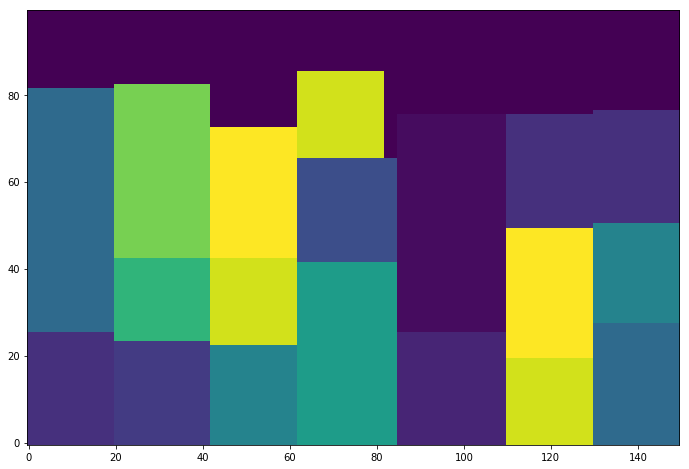

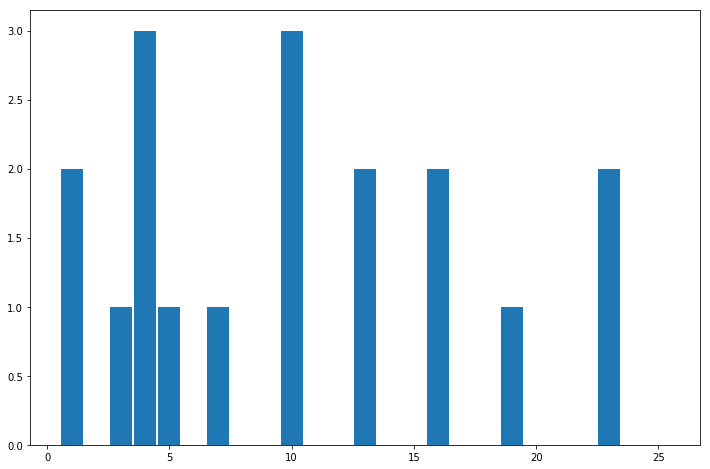

[(66, 82), (66, 84), (76, 84), (76, 129), (77, 129), (77, 149), (99, 149), (99, 0), (82, 0), (82, 19), (83, 19), (83, 42), (73, 42), (73, 61), (86, 61), (86, 82)]


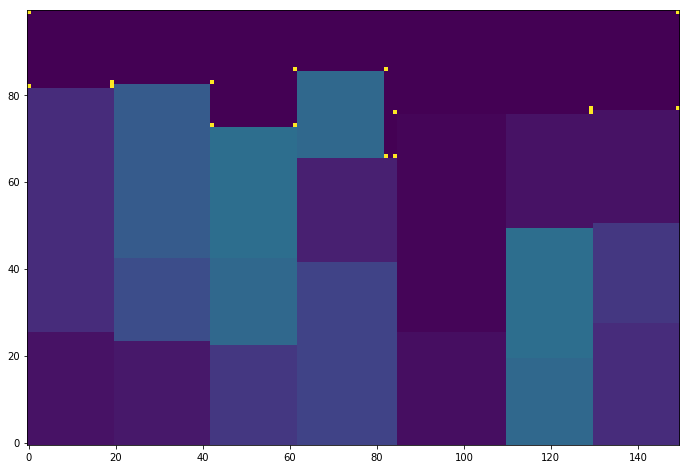

In [11]:
#hist = np.array(sequence[233])-1
hist = np.array([15, 17, 24, 16, 17, 22, 20, 12, 25, 19, 24, 6, 22, 23, 24, 26, 11, 26, 11, 1, 22, 23, 24, 25, 14, 3, 11, 23, 22])-1
print len(hist)
#hist = [13,  3, 24,  9, 13, 24]
# 21, 24, 3, 21
hist = [3, 4, 12, 15, 2, 26, 9, 28, 15, 26, 18, 9, 0, 12, 6, 22, 28, 3, 0, 3, 9, 22, 26]
        
Maskmap1, ToGo = rpmp.do_fill(hist, lens)

plt.figure(figsize=(12,8))
plt.imshow(Maskmap1, origin='lower')
plt.show()

plt.figure(figsize=(12,8))
plt.hist(np.array(hist)+0.5, bins = np.arange(26)+0.5,rwidth = 0.9)
plt.show()

nodes =  rpmp.find_all_nodes(Maskmap1)
print nodes
if nodes[-1] != -1:
    Nodemap = Maskmap1.copy()
    for i in range(len(nodes)): 
        Nodemap[nodes[i][0], nodes[i][1]] = 80

    plt.figure(figsize=(12,8))
    plt.imshow(Nodemap, origin='lower')
    plt.show()


In [378]:
np.sqrt(150 * 100 * 0.01)

12.24744871391589

In [281]:
1. * 60 * 60 / (150 * 200)

0.12

True True


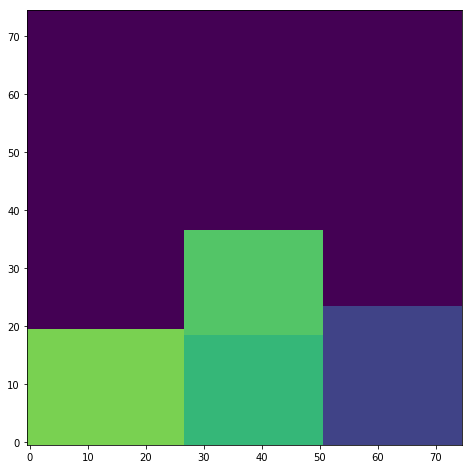

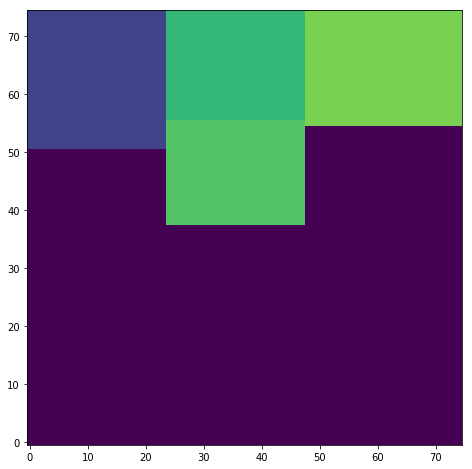

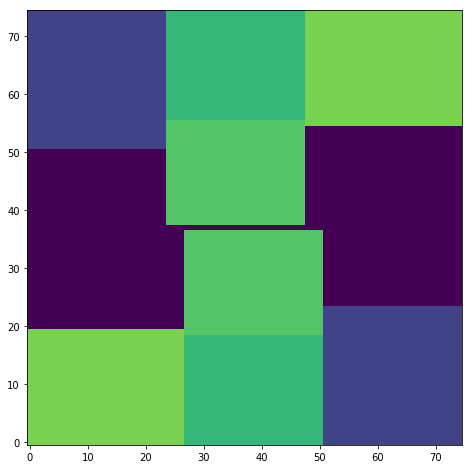

1617
1
0


TypeError: 'NoneType' object has no attribute '__getitem__'

In [50]:
hist = np.array([ 24 , 20 , 6 ,  22])-1 #  |   5   18  4   8   13
Maskmap1, ToGo = rpmp.do_fill(hist, lens)

hist2 = np.array([24 , 20 , 6 ,  22])-1
Maskmap2, ToGo2 = rpmp.do_fill(hist2, lens)
Maskmap2 = rotate_180(Maskmap2)

print ToGo, ToGo2
Maskmap3 = Maskmap1 + Maskmap2

Nodemap = Maskmap3.copy()

#nodes =  rpmp.find_all_nodes(Nodemap)
#print nodes

plt.figure(figsize=(12,8))
plt.imshow(Maskmap1, origin='lower',vmin = 0, vmax = 30)
plt.show()

plt.figure(figsize=(12,8))
plt.imshow(Maskmap2, origin='lower',vmin = 0, vmax = 30)
plt.show()

plt.figure(figsize=(12,8))
plt.imshow(Maskmap3, origin='lower',vmin = 0, vmax = 30)
plt.show()
print np.sum(Maskmap3.ravel()==0)
print np.max(np.sign(Maskmap1) + np.sign(Maskmap2))
print np.min(np.sign(Maskmap1) + np.sign(Maskmap2))

if len(nodes) > 1:
    Nodemap = Maskmap3.copy()
    nodes =  rpmp.find_all_nodes(Nodemap)
    for i in range(len(nodes)): 
        Nodemap[nodes[i][0], nodes[i][1]] = 80

    plt.figure(figsize=(12,8))
    plt.imshow(Nodemap, origin='lower')
    plt.show()

hist3 = list(hist) + list(hist2[::-1])
print hist3
Maskmap, ToGo = rpmp.do_fill(hist3, lens)

plt.figure(figsize=(12,8))
plt.imshow(Maskmap, origin='lower',vmin = 0, vmax = 30)
plt.show()

Nodemap = Maskmap.copy()

nodes =  rpmp.find_all_nodes(Nodemap)
print nodes


In [34]:
Maskmap3[40,40]

2

In [23]:
a= np.sign(Maskmap) + np.sign(Maskmap2)
np.max(a.ravel())

1

In [83]:

nodes =  rpmp.find_all_nodes(Maskmap2)
if nodes[-1] == -1:
    print 'error!'
else:
    print 'nodes = ',nodes
    for i in range(len(nodes)): 
        Maskmap[nodes[i][0], nodes[i][1]] = 80

    plt.figure(figsize=(12,8))
    plt.imshow(Maskmap, origin='lower')
    plt.show()

nodes =  [0]


TypeError: 'int' object has no attribute '__getitem__'

In [3]:
seq = [list(np.array([1,2,2,1]) - 1)]
seq2 = rpmp.find_sequence_multiproc(lens, seq, 1, 0)
print seq2
print seq2[0]

[]


IndexError: list index out of range

In [5]:

hist = seq2[0]


Maskmap, ToGo = rpmp.do_fill(hist, lens)


plt.figure(figsize=(12,8))
plt.imshow(Maskmap, origin='lower')
plt.show()



TypeError: 'int' object has no attribute '__getitem__'

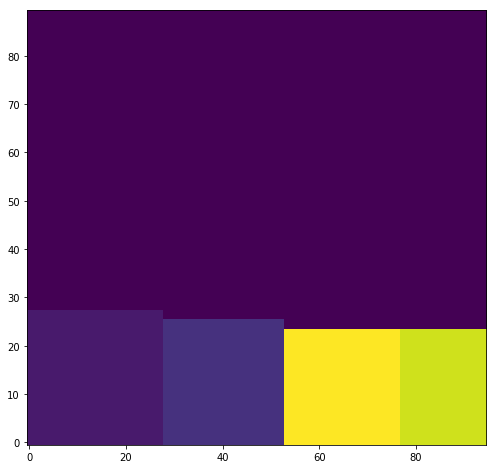

True


In [5]:

hist = np.array([13 , 7,   8 ,  4  , 3 ,  13 , 16 , 6 ,  4,   12  ,14 , 10,  3]) - 1
hist = np.array([1  , 2  , 14,  13])- 1
#hist =  [0, 0, 0]

Maskmap, ToGo = rpmp.do_fill(hist, lens)


plt.figure(figsize=(12,8))
plt.imshow(Maskmap, origin='lower')
plt.show()
print ToGo


nodes =  [(26, 0), (26, 94), (89, 94), (89, 0)]


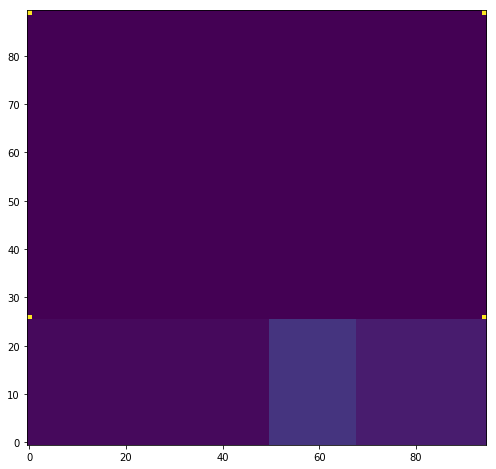

In [41]:

nodes =  rpmp.find_all_nodes(Maskmap)
if nodes[-1] == -1:
    print 'error!'
else:
    print 'nodes = ',nodes
    for i in range(len(nodes)): 
        Maskmap[nodes[i][0], nodes[i][1]] = 80

    plt.figure(figsize=(12,8))
    plt.imshow(Maskmap, origin='lower')
    plt.show()

In [5]:
Maskmap[51,40]

12

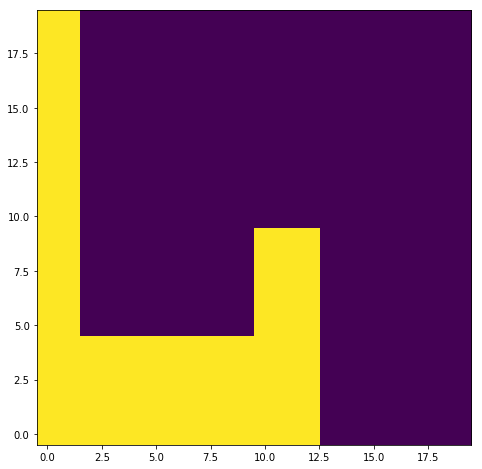

  find nodes (new method)
  0.001 sec.


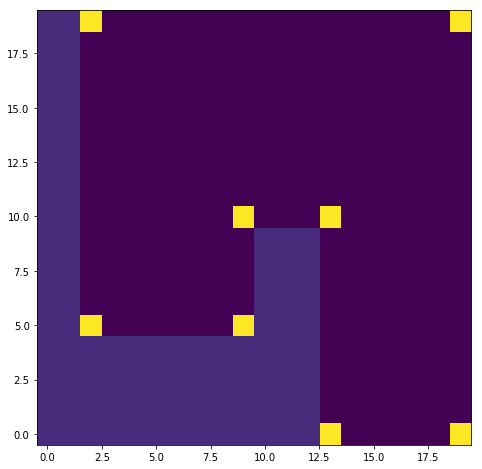

In [2]:

Maskmap = np.zeros((20,20))
#Maskmap[:5,:10] = 10
Maskmap[:5,:10] = 10; Maskmap[:10,10:13]  = 10; Maskmap[:,:2] = 10
plt.figure(figsize=(12,8))
plt.imshow(Maskmap, origin='lower')
plt.show()


nodes =  rp.find_all_nodes(Maskmap)
for i in range(len(nodes)): 
    Maskmap[nodes[i][0], nodes[i][1]] = 80

plt.figure(figsize=(12,8))
plt.imshow(Maskmap, origin='lower')
plt.show()

In [15]:
N = 150 * 200 / (25*25)
print 16**N / 1e10

6.27710173539e+47


In [3]:
width = 150;  height = 200;
x1d   = np.arange(width); y1d = np.arange(height); 
x2d, y2d = np.meshgrid(x1d, y1d) 
Maskmap0 = np.zeros((height,width), dtype = int)

In [4]:
lens = rp.rectangles()
lens.add(28,28); lens.add(26,25); lens.add(25,26);
lens.add(20,26); lens.add(23,28); lens.add(26,27);
lens.add(27,24); lens.add(27,27); lens.add(20,28); 
lens.add(24,27); lens.add(26,26); lens.add(26,18);
lens.add(24,18); lens.add(24,24); lens.add(23,24);
lens.add(26,24);

print lens.Ntype, lens.type, lens.Nused, lens.ID

initializing global parameters...
16 [(28, 28), (26, 25), (25, 26), (20, 26), (23, 28), (26, 27), (27, 24), (27, 27), (20, 28), (24, 27), (26, 26), (26, 18), (24, 18), (24, 24), (23, 24), (26, 24)] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


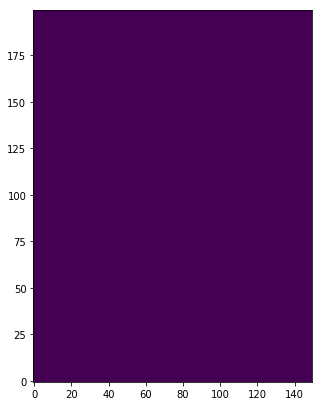

  find nodes (new method)
  0.000 sec.
nodes :  4 [(0, 0), (0, 149), (199, 149), (199, 0)]


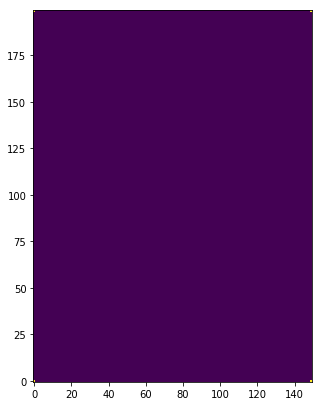

nodes to fill, size:  [(0, 0), (27, 149)] (28, 150)
all lens types [(28, 28), (26, 25), (25, 26), (20, 26), (23, 28), (26, 27), (27, 24), (27, 27), (20, 28), (24, 27), (26, 26), (26, 18), (24, 18), (24, 24), (23, 24), (26, 24)]
fillable?  [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


In [5]:
Maskmap = Maskmap0.copy()
plt.figure(figsize=(5,7))
plt.imshow(Maskmap, origin='lower')
plt.show()
nodes = rp.find_all_nodes(Maskmap)
print 'nodes : ',len(nodes), nodes
Nodemap = Maskmap.copy()
for i in range(len(nodes)): Nodemap[nodes[i]] = 80
plt.figure(figsize=(5,7))
plt.imshow(Nodemap,origin='lower')
plt.show()
_, area = rp.find_nodes_to_fill(nodes,lens)
print 'nodes to fill, size: ', _, area
print 'all lens types', lens.type
print 'fillable? ',rp.find_fillable_types(lens.type,area)


# step : 0
  ** fill multiple types at one **
  find nodes (new method)
  0.000 sec.
[8, 6, 1, 11, 5, 4] 0 150


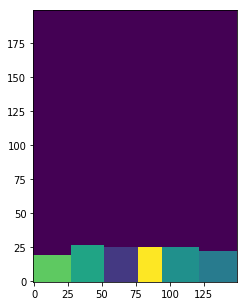

  find nodes (new method)
  0.001 sec.


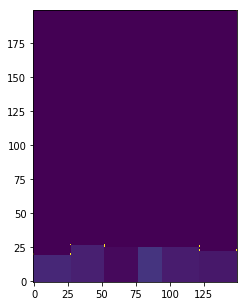

# step : 6
  find all nodes   find nodes (new method)
  0.001 sec.
  Starting node =  (20, 0)   (FILL_HEIGHT, FILL_WIDTH) =  (False, True)
  filling out one type
  avail. types:  [(28, 28), (23, 28), (20, 28)]
  ID_bottom =  8 (20, 28)
  will use : (28, 28)


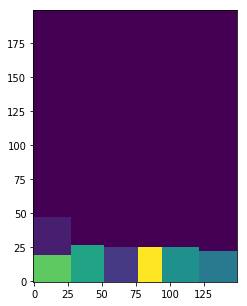

  find nodes (new method)
  0.003 sec.


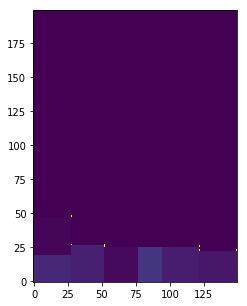

# step : 7
  find all nodes   find nodes (new method)
  0.003 sec.
  Starting node =  (23, 122)   (FILL_HEIGHT, FILL_WIDTH) =  (False, True)
  filling out one type
  avail. types:  [(28, 28), (23, 28), (20, 28)]
  ID_bottom =  4 (23, 28)
  will use : (20, 28)


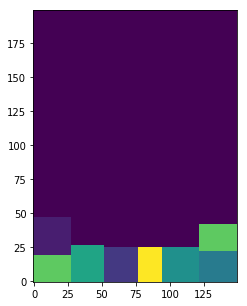

  find nodes (new method)
  0.007 sec.


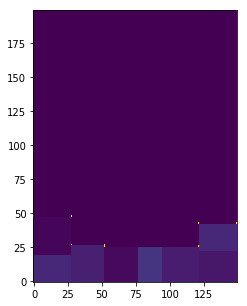

# step : 8
  find all nodes   find nodes (new method)
  0.014 sec.
  Starting node =  (26, 52)   (FILL_HEIGHT, FILL_WIDTH) =  (False, False)
  avail. types:  [(28, 28), (26, 25), (25, 26), (20, 26), (23, 28), (26, 27), (27, 24), (27, 27), (20, 28), (24, 27), (26, 26), (26, 18), (24, 18), (24, 24), (23, 24), (26, 24)]
  ID_bottom =  1 (26, 25)
  will use : (20, 26)


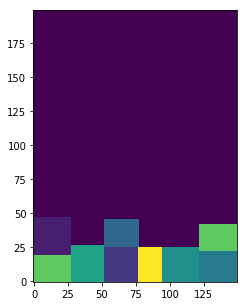

  find nodes (new method)
  0.002 sec.


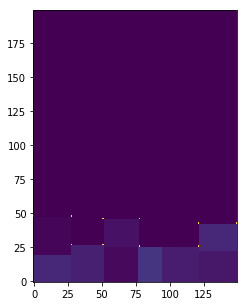

# step : 9
  find all nodes   find nodes (new method)
  0.005 sec.
  Starting node =  (26, 78)   (FILL_HEIGHT, FILL_WIDTH) =  (False, True)
  filling out two types


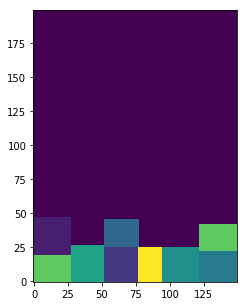

  find nodes (new method)
  0.002 sec.


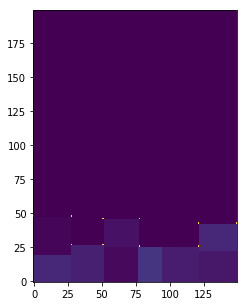

# step : 9
  find all nodes   find nodes (new method)
  0.006 sec.
  Starting node =  (26, 78)   (FILL_HEIGHT, FILL_WIDTH) =  (False, True)
  filling out two types


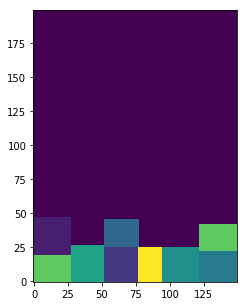

  find nodes (new method)
  0.002 sec.


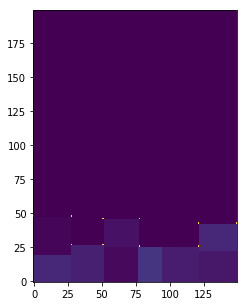

# step : 9
  find all nodes   find nodes (new method)
  0.003 sec.
  Starting node =  (26, 78)   (FILL_HEIGHT, FILL_WIDTH) =  (False, True)
  filling out two types


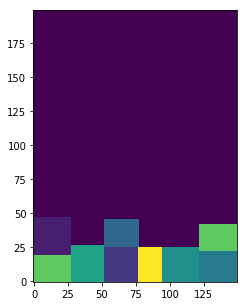

  find nodes (new method)
  0.009 sec.


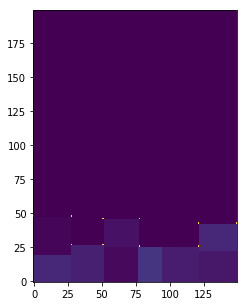

# step : 9
  find all nodes   find nodes (new method)
  0.002 sec.
  Starting node =  (26, 78)   (FILL_HEIGHT, FILL_WIDTH) =  (False, True)
  filling out two types


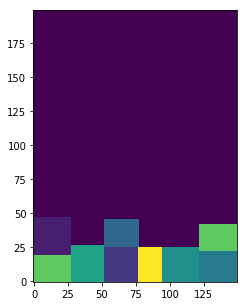

  find nodes (new method)
  0.002 sec.


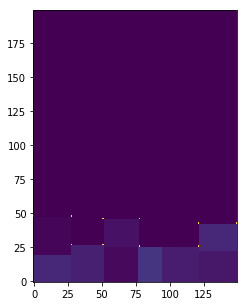

# step : 9
  find all nodes   find nodes (new method)
  0.004 sec.
  Starting node =  (26, 78)   (FILL_HEIGHT, FILL_WIDTH) =  (False, True)
  filling out two types


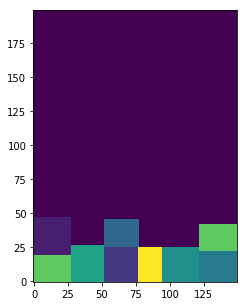

  find nodes (new method)
  0.005 sec.


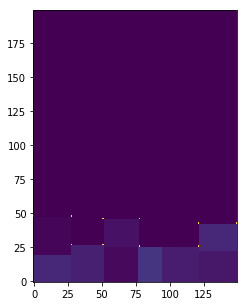

# step : 9
  find all nodes   find nodes (new method)
  0.009 sec.
  Starting node =  (26, 78)   (FILL_HEIGHT, FILL_WIDTH) =  (False, True)
  filling out two types


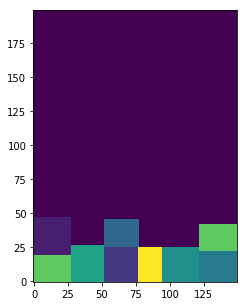

  find nodes (new method)
  0.002 sec.


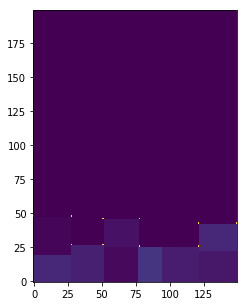

# step : 9
  find all nodes   find nodes (new method)
  0.003 sec.
  Starting node =  (26, 78)   (FILL_HEIGHT, FILL_WIDTH) =  (False, True)
  filling out two types


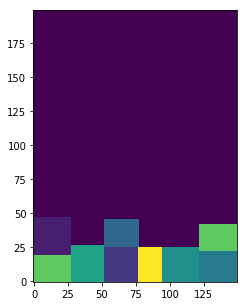

  find nodes (new method)
  0.002 sec.


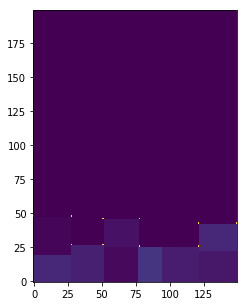

# step : 9
  find all nodes   find nodes (new method)
  0.003 sec.
  Starting node =  (26, 78)   (FILL_HEIGHT, FILL_WIDTH) =  (False, True)
  filling out two types


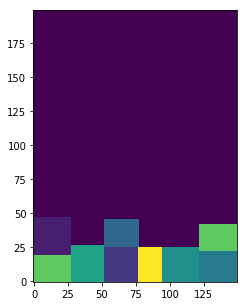

  find nodes (new method)
  0.001 sec.


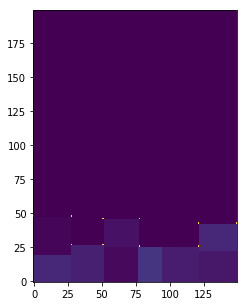

# step : 9
  find all nodes   find nodes (new method)
  0.003 sec.
  Starting node =  (26, 78)   (FILL_HEIGHT, FILL_WIDTH) =  (False, True)
  filling out two types


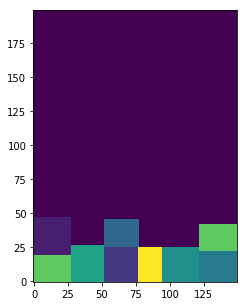

  find nodes (new method)
  0.013 sec.


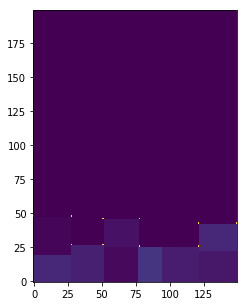

# step : 9
  find all nodes   find nodes (new method)
  0.002 sec.
  Starting node =  (26, 78)   (FILL_HEIGHT, FILL_WIDTH) =  (False, True)
  filling out two types


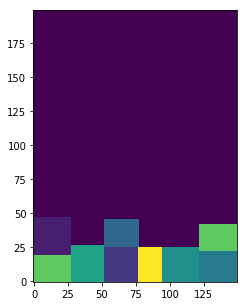

  find nodes (new method)
  0.001 sec.


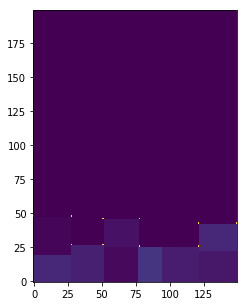

# step : 9
  find all nodes   find nodes (new method)
  0.010 sec.
  Starting node =  (26, 78)   (FILL_HEIGHT, FILL_WIDTH) =  (False, True)
  filling out two types


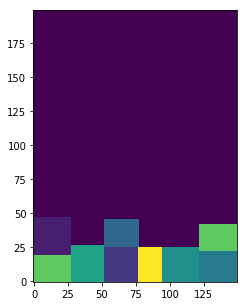

  find nodes (new method)
  0.004 sec.


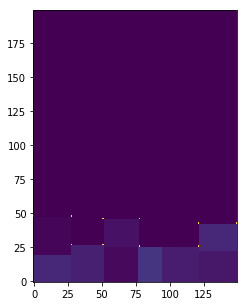

# step : 9
  find all nodes   find nodes (new method)
  0.004 sec.
  Starting node =  (26, 78)   (FILL_HEIGHT, FILL_WIDTH) =  (False, True)
  filling out two types


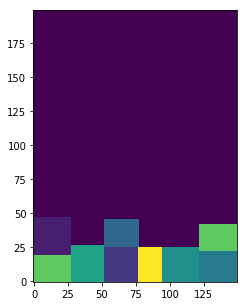

  find nodes (new method)
  0.004 sec.


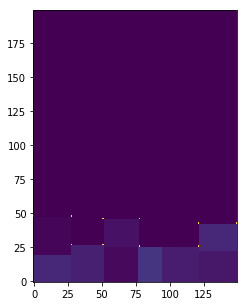

# step : 9
  find all nodes   find nodes (new method)
  0.001 sec.
  Starting node =  (26, 78)   (FILL_HEIGHT, FILL_WIDTH) =  (False, True)
  filling out two types


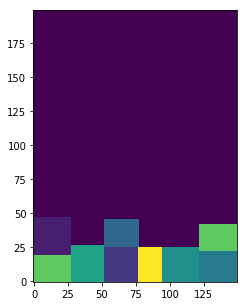

  find nodes (new method)
  0.002 sec.


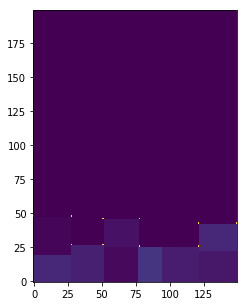

# step : 9
  find all nodes   find nodes (new method)
  0.014 sec.
  Starting node =  (26, 78)   (FILL_HEIGHT, FILL_WIDTH) =  (False, True)
  filling out two types


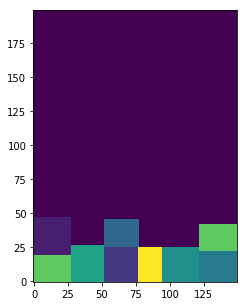

  find nodes (new method)
  0.002 sec.


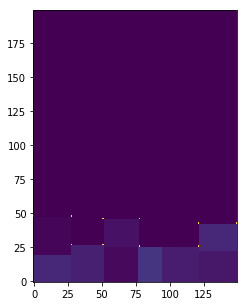

# step : 9
  find all nodes   find nodes (new method)
  0.003 sec.
  Starting node =  (26, 78)   (FILL_HEIGHT, FILL_WIDTH) =  (False, True)
  filling out two types


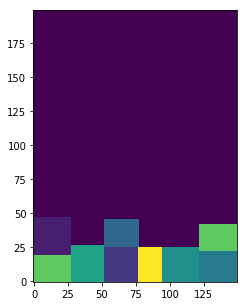

  find nodes (new method)
  0.003 sec.


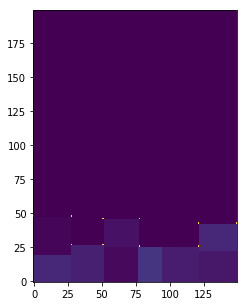

# step : 9
  find all nodes   find nodes (new method)
  0.002 sec.
  Starting node =  (26, 78)   (FILL_HEIGHT, FILL_WIDTH) =  (False, True)
  filling out two types


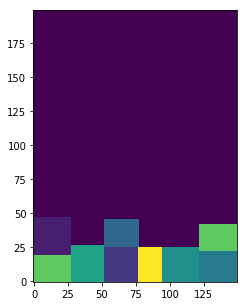

  find nodes (new method)
  0.002 sec.


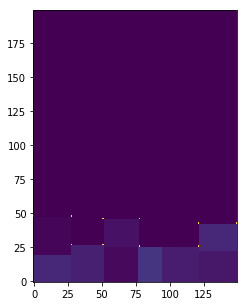

In [6]:

for num in range(20):
    Maskmap,lens = rp.do_fill_demo(Maskmap,lens)
    plt.figure(figsize=(8,5))
    plt.imshow(Maskmap, origin='lower')
    plt.show()    
    Nodemap = Maskmap.copy()
    nodes = rp.find_all_nodes(Nodemap)
    for i in range(len(nodes)): Nodemap[nodes[i]] = 80
    plt.figure(figsize=(8,5))
    plt.imshow(Nodemap,origin='lower')
    plt.show()

    #time.sleep(2)

In [ ]:
Maskmap,lens = rp.do_fill_demo(Maskmap,lens)
plt.figure(figsize=(12,8))
plt.imshow(Maskmap, origin='lower')
plt.show()

Nodemap = Maskmap.copy()
nodes = rp.find_all_nodes(Nodemap)
for i in range(len(nodes)): Nodemap[nodes[i]] = 80
plt.figure(figsize=(12,8))
plt.imshow(Nodemap,origin='lower')
plt.show()

# step : 28
  find all nodes   find nodes (new method)
  0.003 sec.
  Starting node =  (104, 78)   (FILL_HEIGHT, FILL_WIDTH) =  (False, True)
  filling out one type
  avail. types:  [(25, 26), (20, 26), (26, 26)]
  ID_bottom =  10 (26, 26)
  will use : (25, 26)


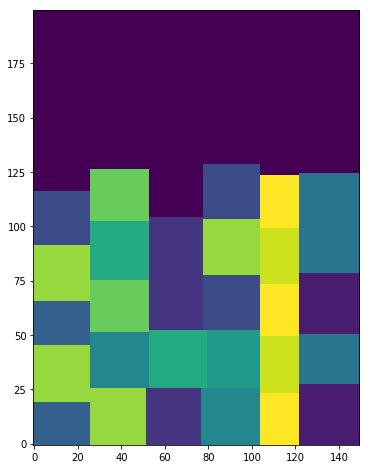

  find nodes (new method)
  0.003 sec.


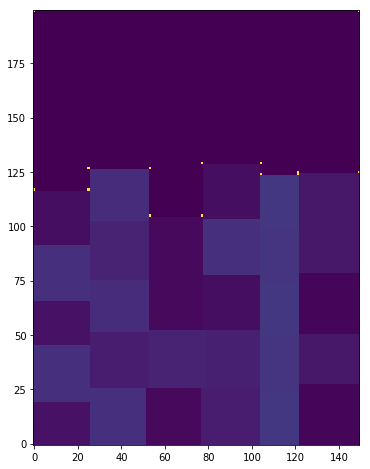

In [8]:
Maskmap,lens = rp.do_fill_demo(Maskmap,lens)
plt.figure(figsize=(12,8))
plt.imshow(Maskmap, origin='lower')
plt.show()

Nodemap = Maskmap.copy()
nodes = rp.find_all_nodes(Nodemap)
for i in range(len(nodes)): Nodemap[nodes[i]] = 80
plt.figure(figsize=(12,8))
plt.imshow(Nodemap,origin='lower')
plt.show()

# step : 29
  find all nodes   find nodes (new method)
  0.003 sec.
  Starting node =  (105, 53)   (FILL_HEIGHT, FILL_WIDTH) =  (True, True)
  packing one type
  avail. types:  []
  ID_bottom =  1 (26, 25)
  no types to pack... find types to pack horizontally
  will use : (26, 25)


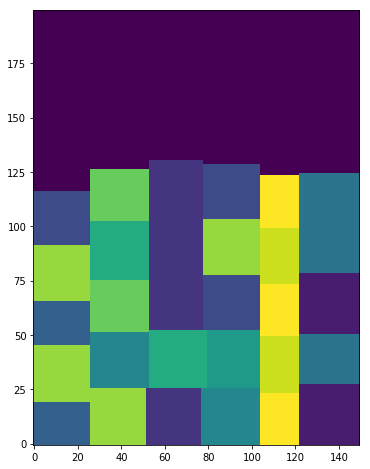

  find nodes (new method)
  0.002 sec.


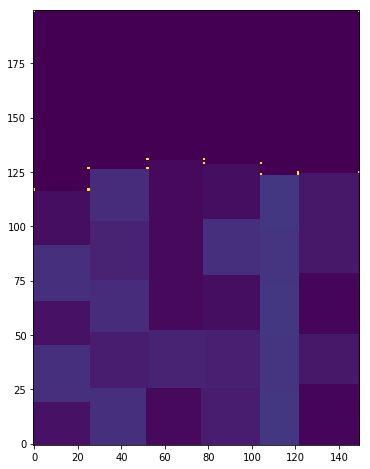

In [9]:
rp.do_fill_demo(Maskmap,lens)
plt.figure(figsize=(12,8))
plt.imshow(Maskmap, origin='lower')
plt.show()
Nodemap = Maskmap.copy()
nodes = rp.find_all_nodes(Nodemap)
for i in range(len(nodes)): Nodemap[nodes[i]] = 80
plt.figure(figsize=(12,8))
plt.imshow(Nodemap,origin='lower')
plt.show()

# step : 30
  find all nodes   find nodes (new method)
  0.003 sec.
  Starting node =  (117, 0)   (FILL_HEIGHT, FILL_WIDTH) =  (False, True)
  filling out one type
  avail. types:  [(25, 26), (20, 26), (26, 26)]
  ID_bottom =  2 (25, 26)
  will use : (20, 26)


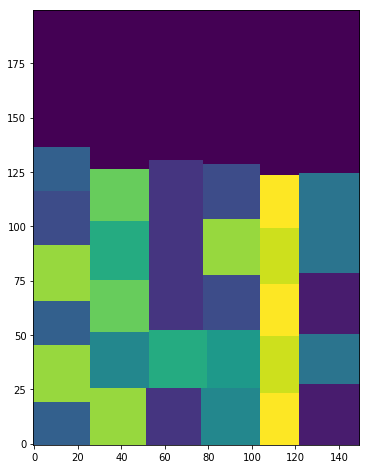

  find nodes (new method)
  0.004 sec.


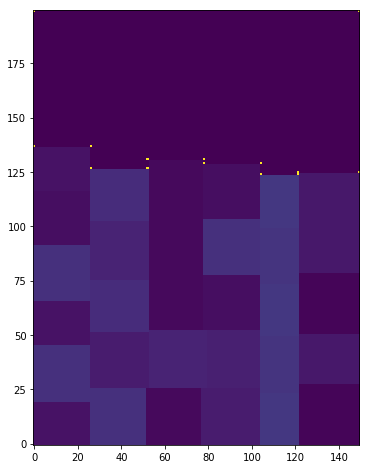

In [10]:
rp.do_fill_demo(Maskmap,lens)
plt.figure(figsize=(12,8))
plt.imshow(Maskmap, origin='lower')
plt.show()
Nodemap = Maskmap.copy()
nodes = rp.find_all_nodes(Nodemap)
for i in range(len(nodes)): Nodemap[nodes[i]] = 80
plt.figure(figsize=(12,8))
plt.imshow(Nodemap,origin='lower')
plt.show()

# step : 31
  find all nodes   find nodes (new method)
  0.003 sec.
  Starting node =  (124, 104)   (FILL_HEIGHT, FILL_WIDTH) =  (False, True)
  filling out one type
  avail. types:  [(26, 18), (24, 18)]
  ID_bottom =  12 (24, 18)
  will use : (24, 18)


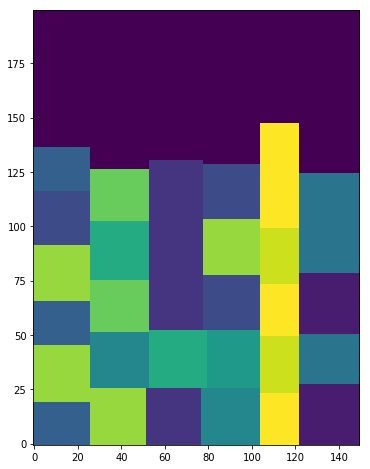

  find nodes (new method)
  0.004 sec.


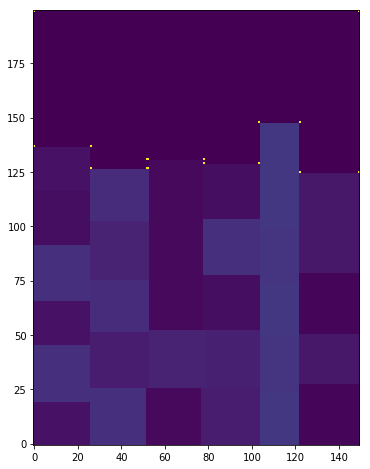

In [11]:
rp.do_fill_demo(Maskmap,lens)
plt.figure(figsize=(12,8))
plt.imshow(Maskmap, origin='lower')
plt.show()
Nodemap = Maskmap.copy()
nodes = rp.find_all_nodes(Nodemap)
for i in range(len(nodes)): Nodemap[nodes[i]] = 80
plt.figure(figsize=(12,8))
plt.imshow(Nodemap,origin='lower')
plt.show()

# step : 13
  find all nodes   find nodes (new method)
  0.002 sec.
  ** warning ** we're almost there to fill vertically... ready for vertical pack
  Starting node =  (46, 124)   (FILL_HEIGHT, FILL_WIDTH) =  (False, True)
  filling out one type
  avail. types:  [(25, 26), (20, 26), (26, 26)]
  ID_bottom =  3 (20, 26)
  will use : (25, 26)


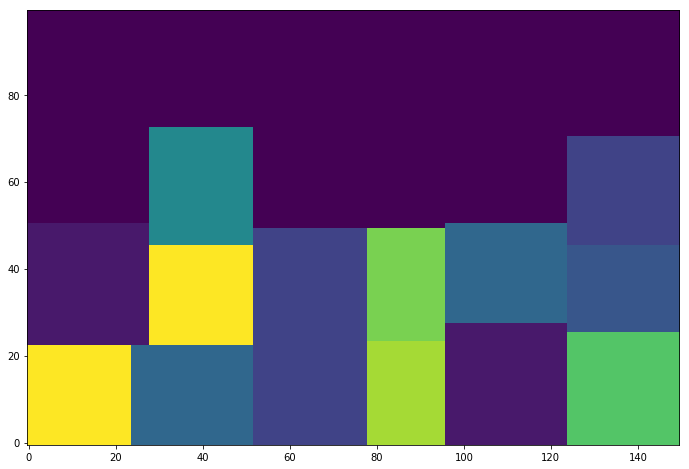

  find nodes (new method)
  0.002 sec.


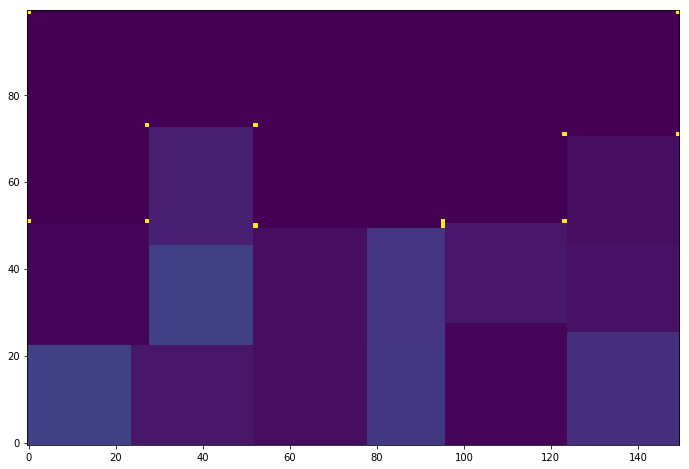

In [14]:
rp.do_fill_demo(Maskmap,lens)
plt.figure(figsize=(12,8))
plt.imshow(Maskmap, origin='lower')
plt.show()
Nodemap = Maskmap.copy()
nodes = rp.find_all_nodes(Nodemap)
for i in range(len(nodes)): Nodemap[nodes[i]] = 80
plt.figure(figsize=(12,8))
plt.imshow(Nodemap,origin='lower')
plt.show()

# step : 14
  find all nodes   find nodes (new method)
  0.002 sec.
  ** warning ** we're almost there to fill vertically... ready for vertical pack
  Starting node =  (50, 52)   (FILL_HEIGHT, FILL_WIDTH) =  (True, True)
  packing one type
  avail. types:  []
  ID_bottom =  2 (25, 26)
  no types to pack... find types to pack horizontally
  found no types to fill... exit


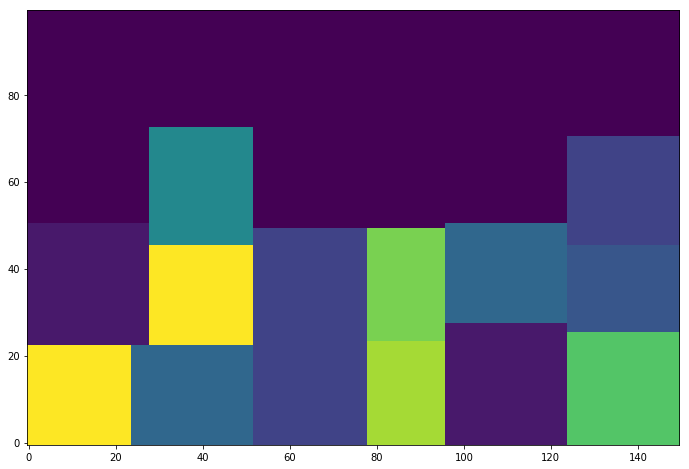

  find nodes (new method)
  0.002 sec.


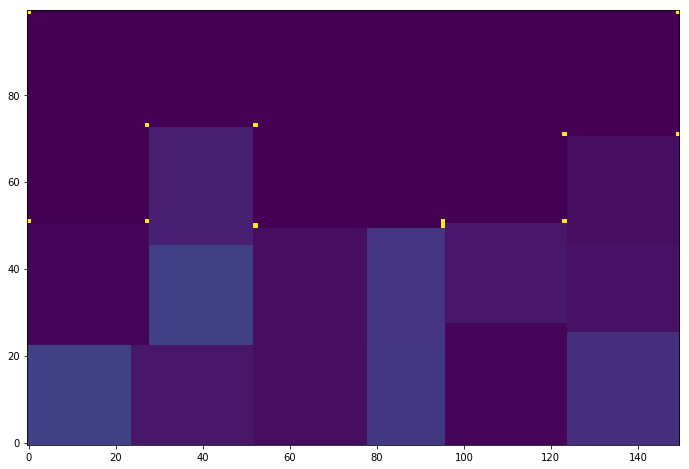

In [15]:
rp.do_fill_demo(Maskmap,lens)
plt.figure(figsize=(12,8))
plt.imshow(Maskmap, origin='lower')
plt.show()
Nodemap = Maskmap.copy()
nodes = rp.find_all_nodes(Nodemap)
for i in range(len(nodes)): Nodemap[nodes[i]] = 80
plt.figure(figsize=(12,8))
plt.imshow(Nodemap,origin='lower')
plt.show()

In [10]:
rp.do_fill(Maskmap,lens)
plt.figure(figsize=(8,12))
plt.imshow(Maskmap, origin='lower')
plt.show()
Nodemap = Maskmap.copy()
nodes = rp.find_all_nodes(Nodemap)
for i in range(len(nodes)): Nodemap[nodes[i]] = 80
plt.figure(figsize=(8,12))   
plt.imshow(Nodemap,origin='lower')
plt.show()

# step : 12  (going to fill 13th type)
  find nodes
  starting node:  (0, 141) node up:  (26, 141) node right:  (0, 149)  ending node :  (199, 149)   size :  (200, 9)
  packing history:  [(23, 28), (20, 26), (26, 26), (24, 24), (28, 28), (24, 18), (24, 18), (27, 27), (24, 18), (26, 26), (20, 26), (26, 25)]
  tried to fill before
  first try to fill
  no available rectangles to fill, step back...
  move to step No.  11
  now avail. type(s) is(are):  [(28, 28), (25, 26), (20, 26), (23, 28), (26, 27), (27, 24), (27, 27), (20, 28), (24, 27), (26, 26), (26, 18), (24, 18), (24, 24), (23, 24), (26, 24)]
  will remove type (26, 25)


ValueError: list.remove(x): x not in list

In [9]:
rp.do_fill(Maskmap,lens)
plt.figure(figsize=(8,12))
plt.imshow(Maskmap, origin='lower')
plt.show()
Nodemap = Maskmap.copy()
nodes = rp.find_all_nodes(Nodemap)
for i in range(len(nodes)): Nodemap[nodes[i]] = 80
plt.figure(figsize=(8,12))       
plt.imshow(Nodemap,origin='lower')
plt.show()

# step : 6  (going to fill 7th type)
  find nodes
  starting node:  (0, 144) node up:  (23, 144) node right:  (0, 149)  ending node :  (199, 149)   size :  (200, 6)
  packing history:  [(28, 28), (26, 18), (28, 28), (24, 18), (27, 24), (26, 18)]
  tried to fill before
  no available rectangles to fill, step back...
  move to step No.  5
  now avail. type(s) is(are):  [(28, 28), (26, 25), (25, 26), (20, 26), (23, 28), (26, 27), (27, 24), (27, 27), (20, 28), (24, 27), (26, 26), (24, 18), (24, 24), (23, 24), (26, 24)]
  will remove type (26, 18)


ValueError: list.remove(x): x not in list

# step : 6  (going to fill 7th type)
  find nodes
  starting node:  (0, 148) node up:  (24, 148) node right:  (0, 149)  ending node :  (199, 149)   size :  (200, 2)
  packing history:  [(26, 27), (25, 26), (20, 26), (26, 26), (26, 25), (24, 18)]
  tried to fill before
  first try to fill
  no available rectangles to fill, step back...
  move to step No.  5
  now avail. type(s) is(are):  [(26, 18)]
  no avail. type... move one more step back
  move to step No.  4
  now avail. type(s) is(are):  [(28, 28), (26, 25), (25, 26), (20, 26), (23, 28), (26, 27), (27, 24), (27, 27), (20, 28), (24, 27), (26, 26), (26, 18), (24, 18), (24, 24), (23, 24), (26, 24)]
  will remove type (26, 25)


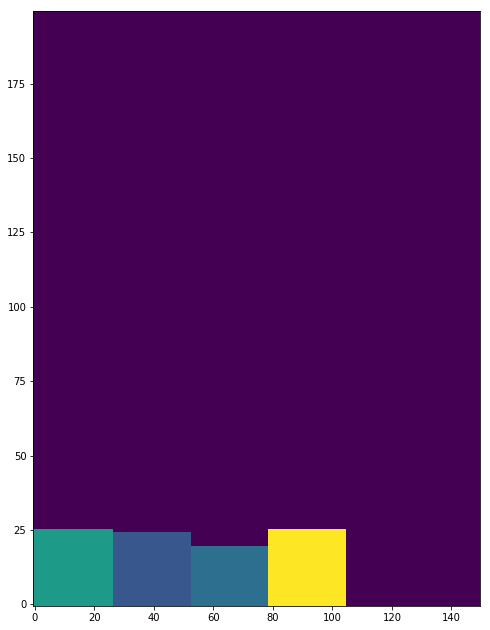

  find nodes


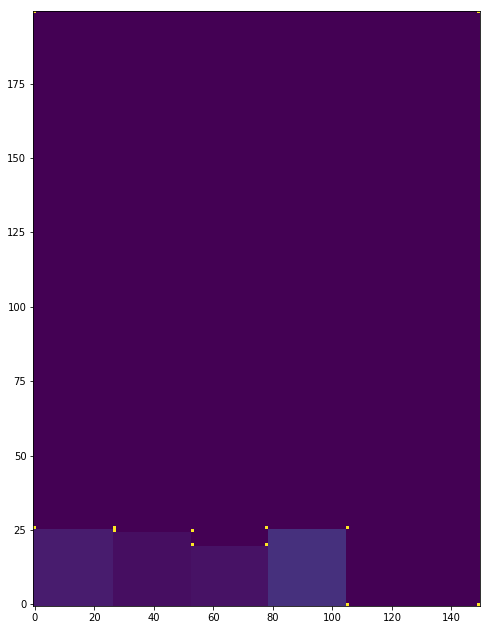

In [25]:
rp.do_fill(Maskmap,lens)
plt.figure(figsize=(8,12))
plt.imshow(Maskmap, origin='lower')
plt.show()
Nodemap = Maskmap.copy()
nodes = rp.find_all_nodes(Nodemap)
for i in range(len(nodes)): Nodemap[nodes[i]] = 80
plt.figure(figsize=(8,12))     
plt.imshow(Nodemap,origin='lower')
plt.show()

# step : 4  (going to fill 5th type)
  find nodes
  starting node:  (0, 105) node up:  (26, 105) node right:  (0, 149)  ending node :  (199, 149)   size :  (200, 45)
  packing history:  [(26, 27), (25, 26), (20, 26), (26, 26)]
  tried to fill before
  avail. types:  [(28, 28), (25, 26), (20, 26), (23, 28), (26, 27), (27, 24), (27, 27), (20, 28), (24, 27), (26, 26), (26, 18), (24, 18), (24, 24), (23, 24)]
  will use : (26, 25)


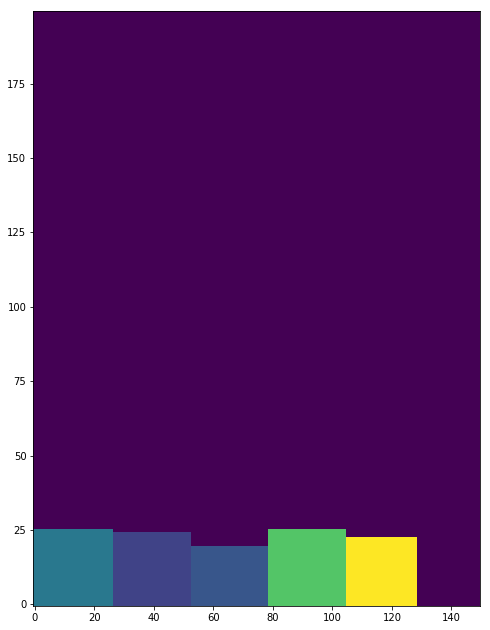

  find nodes


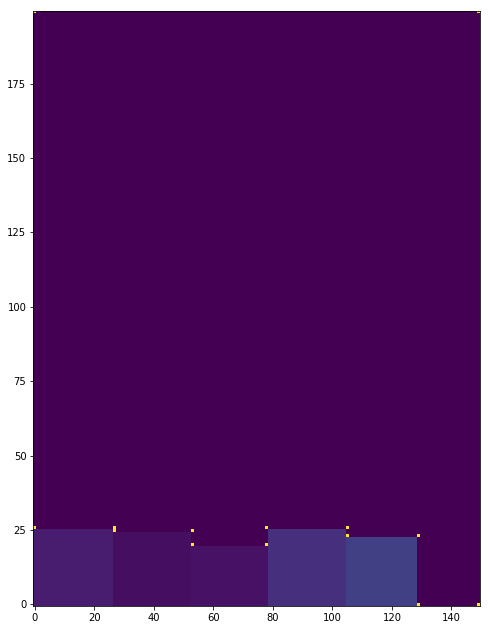

In [26]:
rp.do_fill(Maskmap,lens)
plt.figure(figsize=(8,12)) 
plt.imshow(Maskmap, origin='lower')
plt.show()
Nodemap = Maskmap.copy()
nodes = rp.find_all_nodes(Nodemap)
for i in range(len(nodes)): Nodemap[nodes[i]] = 80
plt.figure(figsize=(8,12))    
plt.imshow(Nodemap,origin='lower')
plt.show()

# step : 5  (going to fill 6th type)
  find nodes
  starting node:  (0, 129) node up:  (23, 129) node right:  (0, 149)  ending node :  (199, 149)   size :  (200, 21)
  packing history:  [(26, 27), (25, 26), (20, 26), (26, 26), (26, 25)]
  tried to fill before
  first try to fill
  avail. types:  [(26, 18), (24, 18)]
  will use : (24, 18)


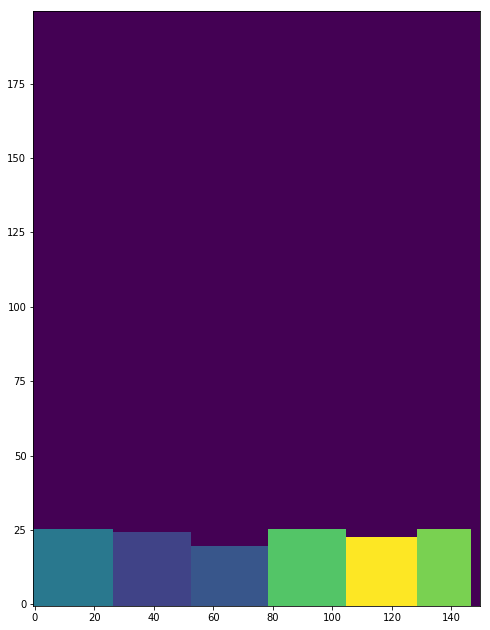

  find nodes


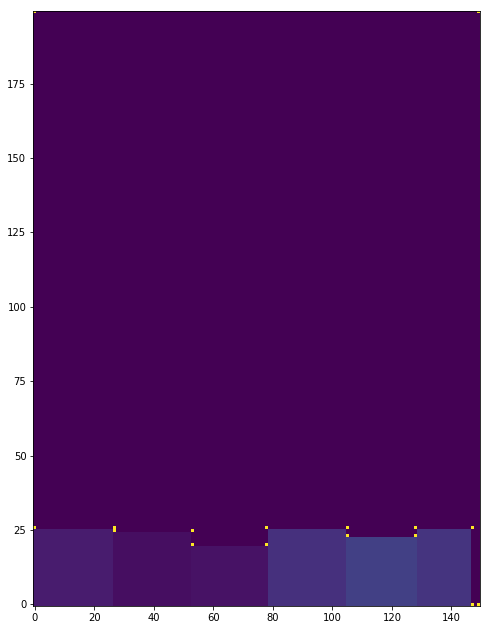

In [27]:
rp.do_fill(Maskmap,lens)
plt.figure(figsize=(8,12))
plt.imshow(Maskmap, origin='lower')
plt.show()
Nodemap = Maskmap.copy()
nodes = rp.find_all_nodes(Nodemap)
for i in range(len(nodes)): Nodemap[nodes[i]] = 80
plt.figure(figsize=(8,12))       
plt.imshow(Nodemap,origin='lower')
plt.show()

In [28]:
rp.do_fill(Maskmap,lens)
plt.figure(figsize=(8,12))
plt.imshow(Maskmap, origin='lower')
plt.show()
Nodemap = Maskmap.copy()
nodes = rp.find_all_nodes(Nodemap)
for i in range(len(nodes)): Nodemap[nodes[i]] = 80
plt.figure(figsize=(8,12))     
plt.imshow(Nodemap,origin='lower')
plt.show()

# step : 6  (going to fill 7th type)
  find nodes
  starting node:  (0, 147) node up:  (26, 147) node right:  (0, 149)  ending node :  (199, 149)   size :  (200, 3)
  packing history:  [(26, 27), (25, 26), (20, 26), (26, 26), (26, 25), (24, 18)]
  tried to fill before
  first try to fill
  no available rectangles to fill, step back...
  move to step No.  5
  now avail. type(s) is(are):  [(26, 18)]
  no avail. type... move one more step back
  move to step No.  4
  now avail. type(s) is(are):  [(28, 28), (25, 26), (20, 26), (23, 28), (26, 27), (27, 24), (27, 27), (20, 28), (24, 27), (26, 26), (26, 18), (24, 18), (24, 24), (23, 24), (26, 24)]
  will remove type (26, 25)


ValueError: list.remove(x): x not in list

# step : 7  (going to fill 8th type)
  find nodes
  starting node:  (23, 24) node up:  (27, 24) node right:  (23, 47)  ending node :  (199, 47)   size :  (177, 24)
  packing history:  [(27, 24), (23, 24), (26, 27), (20, 28), (25, 26), (26, 18), (28, 28)]
  tried to fill before
  no available rectangles to fill, step back...
  move to step No.  6
  now avail. type(s) is(are):  [(28, 28)]
  no avail. type... move one more step back
  move to step No.  5
  now avail. type(s) is(are):  [(24, 18)]
  no avail. type... move one more step back
  move to step No.  4
  now avail. type(s) is(are):  [(28, 28), (26, 25), (25, 26), (20, 26), (23, 28), (26, 27), (27, 24), (27, 27), (20, 28), (24, 27), (26, 26), (26, 18), (24, 18), (24, 24), (23, 24), (26, 24)]
  will remove type (25, 26)


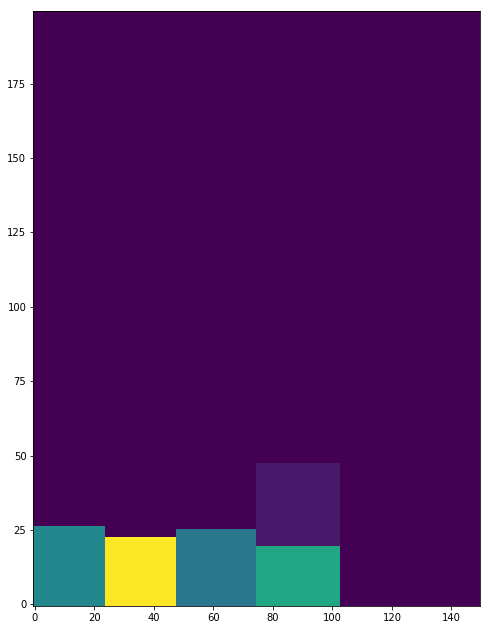

  find nodes


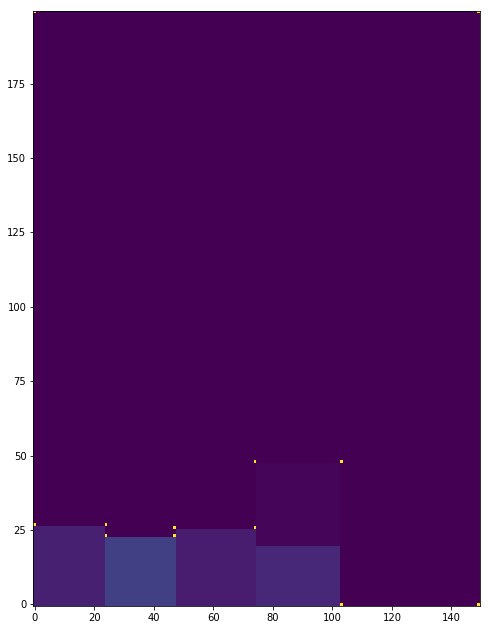

In [132]:
rp.do_fill(Maskmap,lens)
plt.figure(figsize=(8,12))
plt.imshow(Maskmap, origin='lower')
plt.show()
Nodemap = Maskmap.copy()
nodes = rp.find_all_nodes(Nodemap)
for i in range(len(nodes)): Nodemap[nodes[i]] = 80
plt.figure(figsize=(8,12))      
plt.imshow(Nodemap,origin='lower')
plt.show()

# step : 4  (going to fill 5th type)
  find nodes
  starting node:  (0, 102) node up:  (28, 102) node right:  (0, 149)  ending node :  (199, 149)   size :  (200, 48)
  packing history:  [(27, 24), (23, 24), (20, 26), (28, 28)]
  tried to fill before
  avail. types:  [(28, 28), (26, 25), (25, 26), (20, 26), (23, 28), (26, 27), (27, 24), (27, 27), (20, 28), (24, 27), (26, 18), (24, 18), (24, 24), (23, 24)]
  will use : (26, 26)


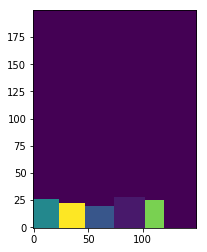

  find nodes


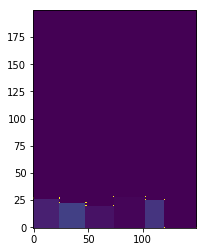

In [14]:
rp.do_fill(Maskmap,lens)
plt.imshow(Maskmap, origin='lower')
plt.show()
Nodemap = Maskmap.copy()
nodes = rp.find_all_nodes(Nodemap)
for i in range(len(nodes)): Nodemap[nodes[i]] = 80
plt.imshow(Nodemap,origin='lower')
plt.show()

# step : 9  (going to fill 10th type)
  find nodes
  starting node:  (26, 28) node up:  (54, 28) node right:  (26, 49)  ending node :  (99, 49)   size :  (74, 22)
  packing history:  [(26, 26), (26, 24), (20, 28), (20, 28), (28, 28), (26, 26), (26, 18), (28, 28), (28, 28)]
  tried to fill before
  no available rectangles to fill, step back...
  move to step No.  8
  now avail. type(s) is(are):  [(28, 28), (26, 25)]
  will remove type (28, 28)


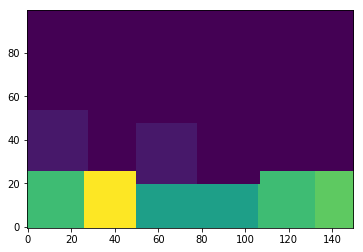

  find nodes


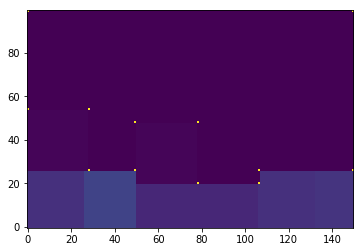

In [95]:
rp.do_fill(Maskmap,lens)
plt.imshow(Maskmap, origin='lower')
plt.show()
Nodemap = Maskmap.copy()
nodes = rp.find_all_nodes(Nodemap)
for i in range(len(nodes)): Nodemap[nodes[i]] = 80
plt.imshow(Nodemap,origin='lower')
plt.show()

# step : 8  (going to fill 9th type)
  find nodes
  starting node:  (20, 78) node up:  (48, 78) node right:  (20, 106)  ending node :  (99, 106)   size :  (80, 29)
  packing history:  [(26, 26), (26, 24), (20, 28), (20, 28), (28, 28), (26, 26), (26, 18), (28, 28)]
  tried to fill before
  avail. types:  [(28, 28)]
  will use : (28, 28)


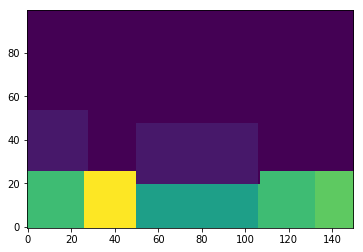

  find nodes


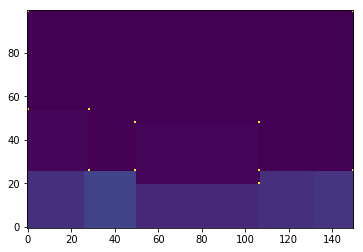

In [96]:
rp.do_fill(Maskmap,lens)
plt.imshow(Maskmap, origin='lower')
plt.show()
Nodemap = Maskmap.copy()
nodes = rp.find_all_nodes(Nodemap)
for i in range(len(nodes)): Nodemap[nodes[i]] = 80
plt.imshow(Nodemap,origin='lower')
plt.show()

In [97]:
rp.do_fill(Maskmap,lens)
plt.imshow(Maskmap, origin='lower')
plt.show()
Nodemap = Maskmap.copy()
nodes = rp.find_all_nodes(Nodemap)
for i in range(len(nodes)): Nodemap[nodes[i]] = 80
plt.imshow(Nodemap,origin='lower')
plt.show()

# step : 9  (going to fill 10th type)
  find nodes


UnboundLocalError: local variable 'node_right' referenced before assignment

# step : 14  (going to fill 15th type)
  find nodes
  starting node:  (35, 0) node up:  (39, 0) node right:  (35, 19)  ending node :  (39, 19)   size :  (5, 20)
  packing history:  [(5, 10), (20, 15), (10, 10), (10, 5), (10, 10), (20, 15), (10, 10), (10, 10), (10, 5), (10, 10), (5, 10), (10, 5), (5, 10), (10, 5)]
  first try to fill
  avail. types:  [(5, 10)]
  will use : (5, 10)


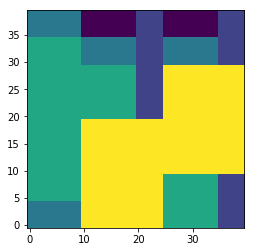

  find nodes


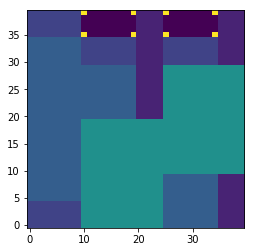

In [19]:
rp.do_fill(Maskmap,lens)
plt.imshow(Maskmap, origin='lower')
plt.show()
Nodemap = Maskmap.copy()
nodes = rp.find_all_nodes(Nodemap)
for i in range(len(nodes)): Nodemap[nodes[i]] = 80
plt.imshow(Nodemap,origin='lower')
plt.show()

# step : 15  (going to fill 16th type)
  find nodes
  starting node:  (35, 10) node up:  (39, 10) node right:  (35, 19)  ending node :  (39, 19)   size :  (5, 10)
  packing history:  [(5, 10), (20, 15), (10, 10), (10, 5), (10, 10), (20, 15), (10, 10), (10, 10), (10, 5), (10, 10), (5, 10), (10, 5), (5, 10), (10, 5), (5, 10)]
  first try to fill
  avail. types:  [(5, 10)]
  will use : (5, 10)


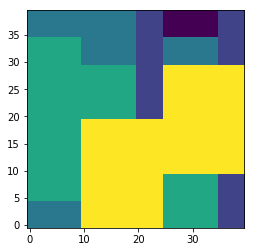

  find nodes


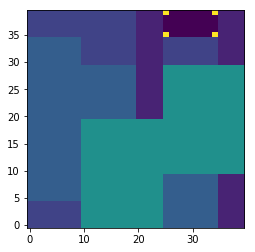

In [20]:
rp.do_fill(Maskmap,lens)
plt.imshow(Maskmap, origin='lower')
plt.show()
Nodemap = Maskmap.copy()
nodes = rp.find_all_nodes(Nodemap)
for i in range(len(nodes)): Nodemap[nodes[i]] = 10
plt.imshow(Nodemap,origin='lower')
plt.show()

# step : 16  (going to fill 17th type)
  find nodes
  starting node:  (35, 25) node up:  (39, 25) node right:  (35, 34)  ending node :  (39, 34)   size :  (5, 10)
  packing history:  [(5, 10), (20, 15), (10, 10), (10, 5), (10, 10), (20, 15), (10, 10), (10, 10), (10, 5), (10, 10), (5, 10), (10, 5), (5, 10), (10, 5), (5, 10), (5, 10)]
  first try to fill
  avail. types:  [(5, 10)]
  will use : (5, 10)


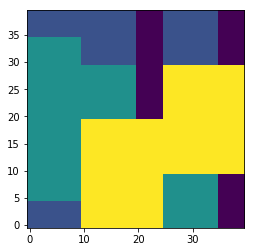

  find nodes


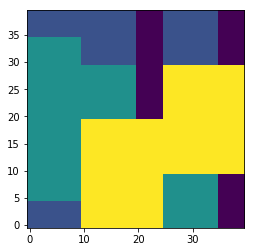

In [21]:
rp.do_fill(Maskmap,lens)
plt.imshow(Maskmap, origin='lower')
plt.show()
Nodemap = Maskmap.copy()
nodes = rp.find_all_nodes(Nodemap)
for i in range(len(nodes)): Nodemap[nodes[i]] = 10
plt.imshow(Nodemap,origin='lower')
plt.show()

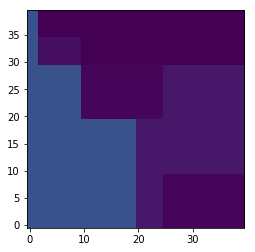

  find nodes
6 [(30, 10), (30, 39), (35, 2), (35, 10), (39, 2), (39, 39)]


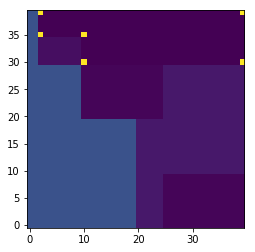

In [18]:
ind = ((x2d < 10) & (y2d < 30)) | ((x2d < 20) & (y2d < 20)) | (x2d < 2)
Maskmap[ind] = 20
plt.imshow(Maskmap,origin='lower', vmax=80)
plt.show()
Nodemap = Maskmap.copy()
nodes = rp.find_all_nodes(Maskmap)
for i in range(len(nodes)): Nodemap[nodes[i]] = 80
print len(nodes), nodes
plt.imshow(Nodemap,origin='lower',vmax=80)
plt.show()    

In [13]:
print rp.find_nodes_to_fill(nodes)
_, area = rp.find_nodes_to_fill(nodes)
print lens.type
rp.fillable_rects(lens.type,area)


([(0, 20), (39, 29)], (40, 10))
[(10, 5), (5, 10), (10, 10), (15, 15), (20, 15), (15, 20)]


[True, True, True, False, False, False]

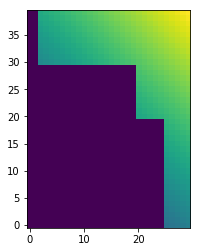

In [7]:
z2d =  (x2d + y2d) + 1
#ind = z2d < 8
ind = ((x2d < 20) & (y2d < 30)) | ((x2d < 25) & (y2d < 20)) | (x2d < 2)
#ind = ((x2d < 20) & (y2d < 30)) | ((x2d < 25) & (y2d < 20))
#ind = ((x2d < 5) & (y2d < 5)) | ((x2d < 15) & (y2d < 2))
#ind = np.logical_not((x2d > 8) & (y2d > 6))
z2d[ind] = 0
h = plt.imshow(z2d,origin='lower')

find nodes
0.017 sec.
2 [(0, 0), (39, 0)]


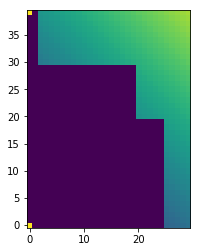

In [8]:
nodes = rp.find_nodes(z2d)
print len(nodes),nodes
for i in range(len(nodes)):
    z2d[nodes[i]] = 80
h = plt.imshow(z2d,origin='lower')

In [136]:
find_nodes(z2d)

find nodes
(10, 15)


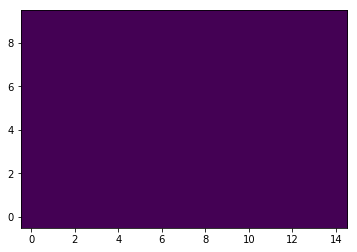

In [80]:
plt.imshow(Maskmap,origin='lower')

In [11]:
node = [(0, 25), (20, 20), (0, 29), (20, 25), (30, 2), (30, 20), (39, 2), (39, 29)]
a, b = rp.nodes_to_fill(node)

In [5]:
dist = [];
for i in range(len(node)): dist.append(node[i][0]**2.+ node[i][1]**2.)
ind = np.argsort(np.array(dist)); node_end = node[ind[-1]];


In [16]:
[(0, 25), (20, 20), (0, 29), (20, 25), (30, 2), (30, 20), (39, 2), (39, 29)]

[(0, 25), (20, 20), (0, 29), (20, 25), (30, 2), (30, 20), (39, 2), (39, 29)]

In [21]:
availtypes = []
for i in range(10): availtypes.append(i);

In [20]:
a = [1,2,3,4,5]
b = []; 
for i in range(len(a)): b.append(a[i])
b.remove(2)
print a, b

[1, 2, 3, 4, 5] [1, 3, 4, 5]


In [20]:
node_right, node_up, node_end =  (0, 39), (10, 5) ,(39, 39)

In [21]:
if node_right[1] < node_end[1] : node_end[1] = node_right[1]

In [25]:
type(node_end)

tuple

In [26]:
type(node_up)

tuple

In [11]:
x1d = np.arange(5); y1d = np.arange(5); 
x2d, y2d = np.meshgrid(x1d, y1d) 
array = x2d ** 2. + y2d ** 2.


In [13]:
array[1:3,1:3]

array([[2., 5.],
       [5., 8.]])

In [38]:
a = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12])
ind0 = np.where(a > 8)[0]
print ind0
a1 = a[ind0].copy()
j = 1
print a1[j]
print a[ind0[j]]


[ 9 10 11 12]
10
10


In [4]:
for i in range(10):
    if i == 5: break
print i

5
